In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

# Multiple Linear Regression
#### Housing Case Study
##### Problem Statement:
Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.
Essentially, the company wants —
To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.
To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.
To know the accuracy of the model, i.e. how well these variables can predict house prices.
So interpretation is important!

# Reading and Understanding the data

In [283]:
housing = pd.read_csv("Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [284]:
housing.shape

(545, 13)

In [285]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [286]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Visualization of all the Numeric Variables

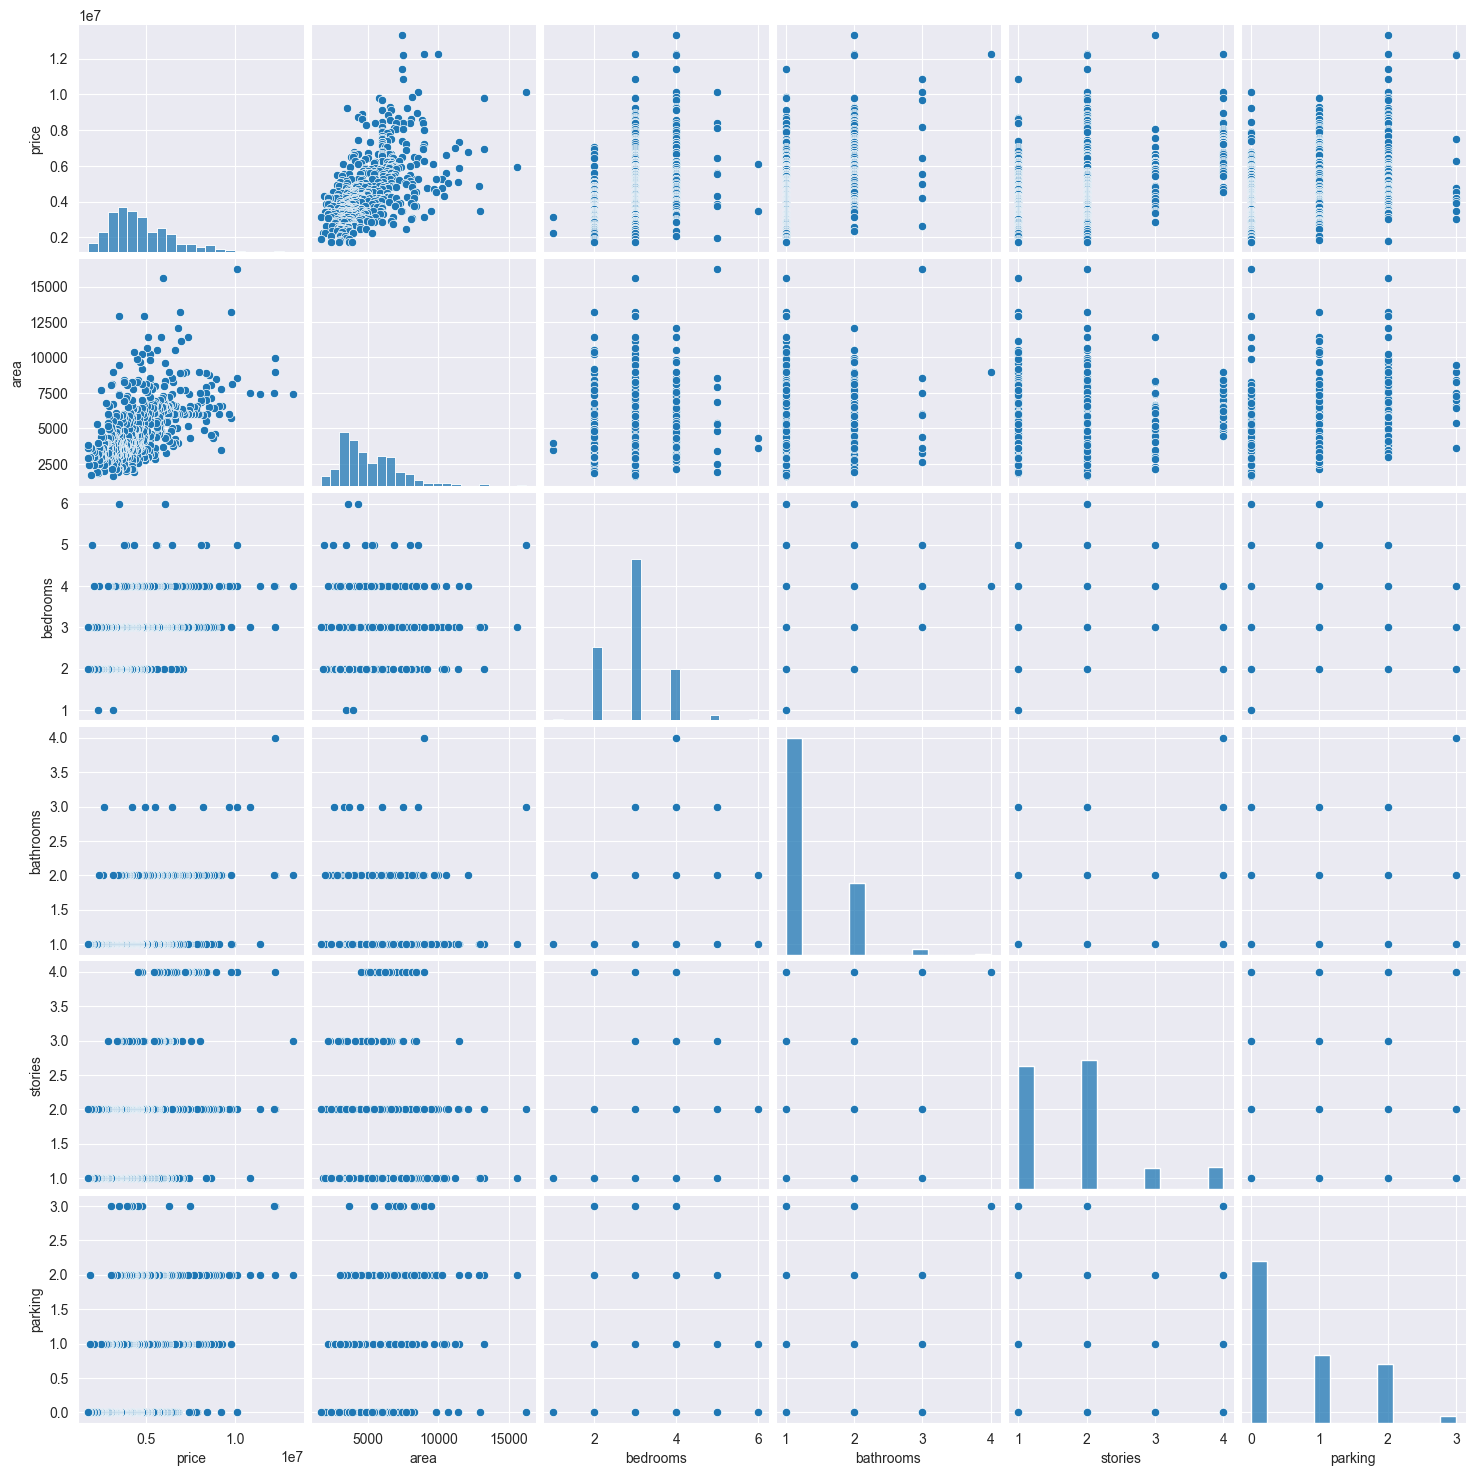

In [287]:
sns.pairplot(data=housing)

## Visualising all the categorical variables

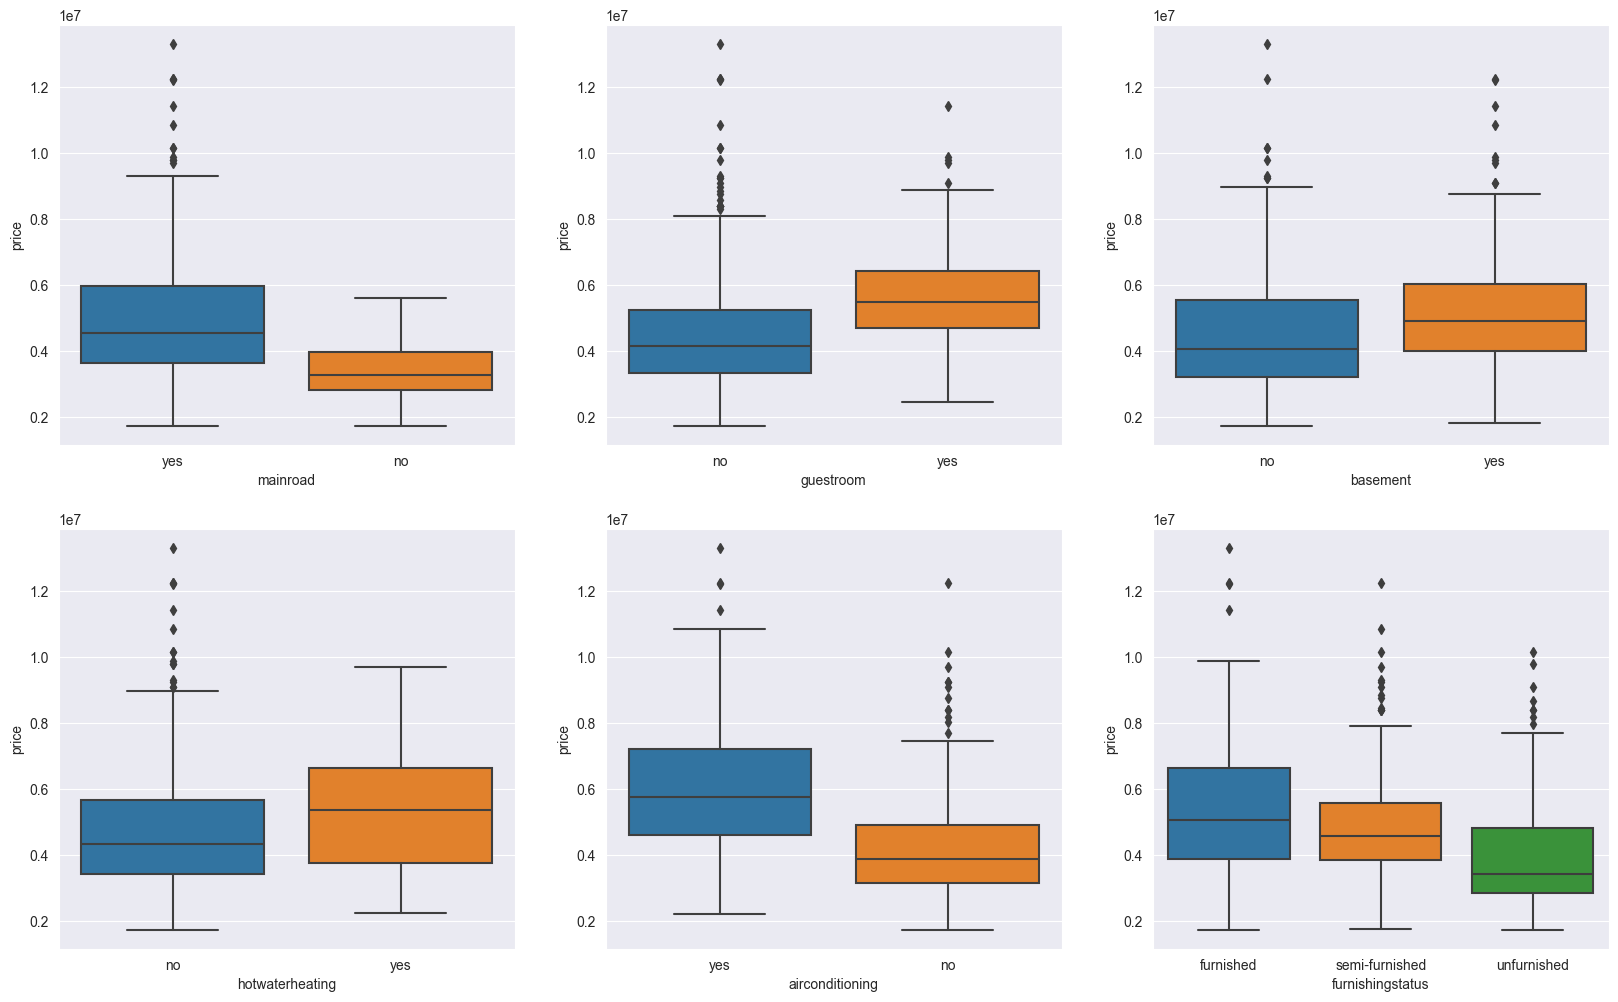

In [288]:
plt.figure(figsize=(20,12))
plt.subplot(2, 3, 1)
sns.boxplot(data=housing, x="mainroad", y="price")

plt.subplot(2, 3, 2)
sns.boxplot(data=housing, x="guestroom", y="price")

plt.subplot(2, 3, 3)
sns.boxplot(data=housing, x="basement", y="price")

plt.subplot(2, 3, 4)
sns.boxplot(data=housing, x="hotwaterheating", y="price")

plt.subplot(2, 3, 5)
sns.boxplot(data=housing, x="airconditioning", y="price")

plt.subplot(2, 3, 6)
sns.boxplot(data=housing, x="furnishingstatus", y="price")
plt.show()

## Step-2) Prepairing the data for modelling
#### Encoding:-
#####   1) Converting the binary categorical variables to 0/1
#####   2) Other categorical variables to dummy variables 

In [289]:
binary_lst = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

In [290]:
housing[binary_lst] = housing[binary_lst].apply(func=lambda x: x.map({"yes": 1, "no": 0}))

In [291]:
housing[binary_lst].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


##### Createing dummy variables for furnishing column

In [292]:
status = pd.get_dummies(data=housing["furnishingstatus"], dtype=int, drop_first=True)
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


00-correspond to furnished
01- unfurnished
10- semi-furnished

In [293]:
##### concat the dummy df with the original df
housing = pd.concat([housing, status], axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [294]:
housing = housing.drop("furnishingstatus", axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


##### - Splitting into train and test
##### - Rescaling of variables

#### Splitting into train test

In [295]:
df_train, df_test = train_test_split(housing, train_size=0.7, random_state=100)
df_train.shape

(381, 14)

In [296]:
df_test.shape

(164, 14)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling (Normalisation): Compresses all your data between 0 and 1
2. Standardisation (mean-0, sigma-1) : It centers you data at man=0 and std=1

This time, we will use MinMax scaling.

In [297]:
# normalisation = (x - xmin) / (xmax - xmin)
# standardisation = (x - mu) / sigma
# Instantiate an object
scaler = MinMaxScaler()

# create a list of numeric variables
num_vars = ["area", "bedrooms", "bathrooms", "stories", "parking", "price"]

# fit on data
df_train[num_vars]

,area,bedrooms,bathrooms,stories,parking,price
359,3600,3,1,1,1,3710000
19,6420,3,2,2,1,8855000
159,3150,3,2,1,0,5460000
35,7000,3,2,4,2,8080940
28,7950,5,2,2,2,8400000
...,...,...,...,...,...,...
526,3180,2,1,1,0,2310000
53,5150,3,2,4,2,7350000
350,3420,2,1,2,1,3780000
79,6000,3,2,3,0,6650000


In [298]:
df_train[num_vars]

,area,bedrooms,bathrooms,stories,parking,price
359,3600,3,1,1,1,3710000
19,6420,3,2,2,1,8855000
159,3150,3,2,1,0,5460000
35,7000,3,2,4,2,8080940
28,7950,5,2,2,2,8400000
...,...,...,...,...,...,...
526,3180,2,1,1,0,2310000
53,5150,3,2,4,2,7350000
350,3420,2,1,2,1,3780000
79,6000,3,2,3,0,6650000


In [299]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.048485,0.118268,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
53,0.484848,0.291623,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
350,0.175758,0.139388,0.2,0.0,0.333333,1,0,0,1,0,0.333333,0,1,0
79,0.424242,0.366420,0.4,0.5,0.666667,1,1,0,0,1,0.000000,0,0,0


In [300]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 3) Training the model

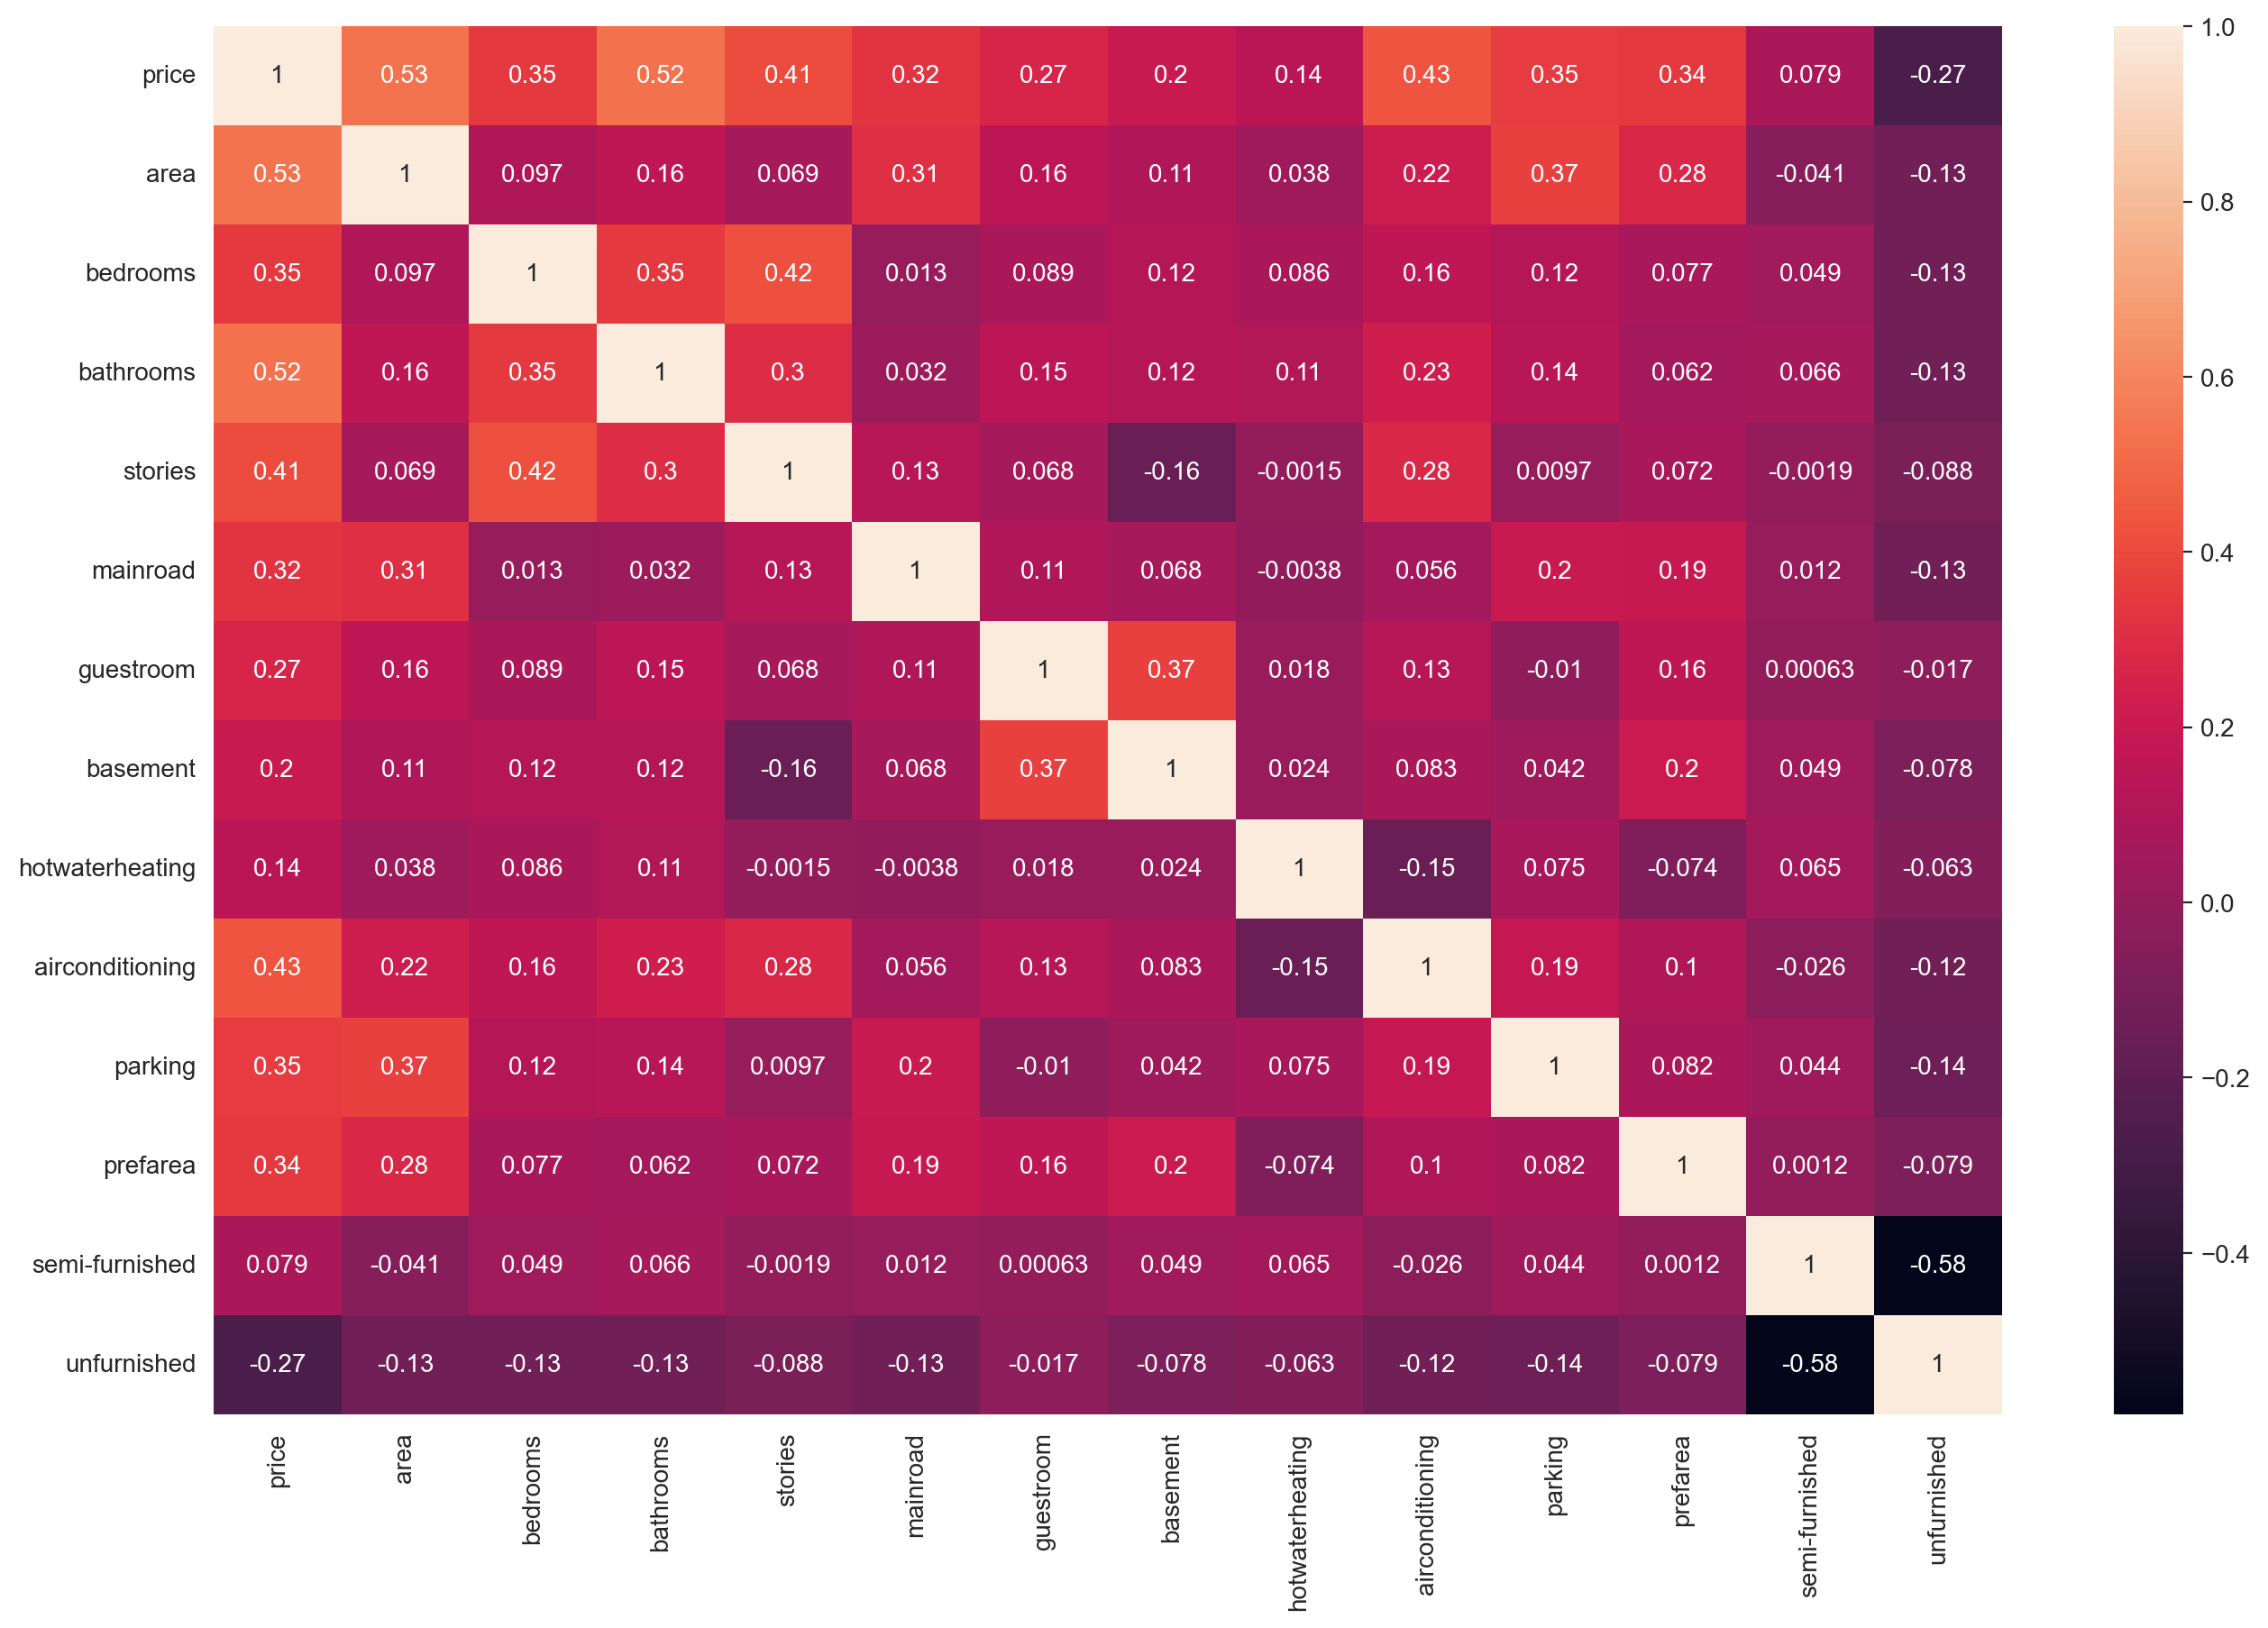

In [301]:
# Heatmap between all the variables
plt.figure(figsize=(16, 10), dpi=200)
sns.heatmap(data=df_train.corr(), annot=True)
plt.show()

Let's use the backward approach i.e. let's build the model with just one variable first and then add variables when needed

In [302]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [303]:
y_train = df_train.pop("price")
X_train = df_train

In [304]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [305]:
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

##### see how statistically significant the variable is
##### if the predictor variables have multicollinearilty then we will have to look at VIF

In [306]:
# adding a constant for the model as statsmodels does not come default with the intercept
X_train_sm = sm.add_constant(X_train["area"])
X_train_sm

,const,area
359,1.0,0.155227
19,1.0,0.403379
159,1.0,0.115628
35,1.0,0.454417
28,1.0,0.538015
...,...,...
526,1.0,0.118268
53,1.0,0.291623
350,1.0,0.139388
79,1.0,0.366420


In [307]:
# create the model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

In [308]:
# params
lr_model.params

const    0.126894
area     0.462192
dtype: float64

In [309]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           3.15e-29
Time:                        15:53:49   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

In [310]:
# adding another variable
X_train_sm = X_train[["area", "bathrooms"]]
X_train_sm = sm.add_constant(X_train_sm)
X_train_sm.head()

,const,area,bathrooms
359,1.0,0.155227,0.0
19,1.0,0.403379,0.5
159,1.0,0.115628,0.5
35,1.0,0.454417,0.5
28,1.0,0.538015,0.5


In [311]:
# creating model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [312]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           2.51e-54
Time:                        15:53:49   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.0

In [313]:
# adding bedrooms next
X_train_sm = X_train[["area", "bedrooms", "bathrooms"]]
X_train_sm = sm.add_constant(X_train_sm)
X_train_sm

,const,area,bedrooms,bathrooms
359,1.0,0.155227,0.4,0.0
19,1.0,0.403379,0.4,0.5
159,1.0,0.115628,0.4,0.5
35,1.0,0.454417,0.4,0.5
28,1.0,0.538015,0.8,0.5
...,...,...,...,...
526,1.0,0.118268,0.2,0.0
53,1.0,0.291623,0.4,0.5
350,1.0,0.139388,0.2,0.0
79,1.0,0.366420,0.4,0.5


In [314]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           3.12e-57
Time:                        15:53:49   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.0

## Adding all the variables 

In [315]:
# whenever you have 2-3% increase in R-squared it is a pretty good increase in the explanation of the variance
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [316]:
# build a model with all the variables
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [317]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           8.83e-83
Time:                        15:53:50   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021     

In [318]:
# we can drop variables that do not contribute to the model by looking at:
#   1) Significance(p value)
#   2) VIF(Variance Inflation factor

#### VIFi = 1/1-Ri^2
##### the higher the vif the higher the multicollinearity

In [319]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


In [320]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           8.83e-83
Time:                        15:53:50   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021     

In [321]:
# VIF should be < 5
# we could have :
# -High cases: high p value and high vif
# - high-low cases: high p value and low vif # remove these first
#                   or low p value and high vif # remove these after the one above
# low cases: low p and low vif
# you choose the high p value one and delete the semi-furnished variable and rebuild the model and see how the vif changes for bedrooms

##### Dropping the semi-furnished variable

In [322]:
X = X_train.drop(labels="semi-furnished", axis=1)
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.118268,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,1
53,0.291623,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0
350,0.139388,0.2,0.0,0.333333,1,0,0,1,0,0.333333,0,0
79,0.366420,0.4,0.5,0.666667,1,1,0,0,1,0.000000,0,0


In [323]:
# Remodelling without the semi-furnished variable
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

In [324]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           1.07e-83
Time:                        15:53:50   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019     

In [325]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [326]:
# removing bedrooms
X = X.drop("bedrooms", axis=1)

In [327]:
# rebuilding the model
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           2.73e-84
Time:                        15:53:50   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015     

In [328]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


In [329]:
# this is probably our final model

## Step 4) Residual Analysis
##### y_train - pred_values of y

In [330]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           2.73e-84
Time:                        15:53:50   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015     

In [331]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

359    0.109599
19     0.463835
159    0.330450
35     0.515631
28     0.468225
         ...   
526    0.079966
53     0.477416
350    0.263852
79     0.443907
520    0.173336
Length: 381, dtype: float64

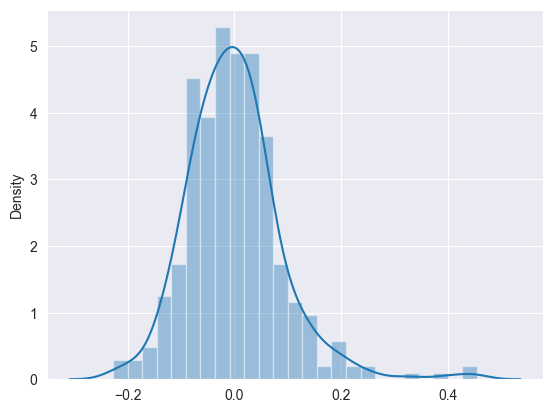

In [332]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

# step-4) Predictions and evaluation on the test set

In [333]:
# create a list of numeric variables
num_vars = ["area", "bedrooms", "bathrooms", "stories", "parking", "price"]

# transform on test data
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [334]:
df_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.145455,0.010032,0.4,0.5,0.333333,1,0,1,0,0,0.000000,1,0,1
191,0.284848,0.780007,0.4,0.0,0.333333,1,1,1,0,0,0.000000,0,1,0
310,0.206061,0.365100,0.4,0.0,0.000000,1,0,1,0,0,0.000000,0,1,0
46,0.500000,0.366420,0.4,0.5,1.000000,1,0,0,0,1,0.333333,0,0,0


In [335]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [336]:
y_test = df_test.pop("price")
X_test = df_test

In [337]:
# add constant
X_test_sm = sm.add_constant(X_test)
X_train_sm

,const,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,1.0,0.155227,0.0,0.000000,1,0,0,0,0,0.333333,0,1
19,1.0,0.403379,0.5,0.333333,1,0,0,0,1,0.333333,1,0
159,1.0,0.115628,0.5,0.000000,1,1,1,0,1,0.000000,0,0
35,1.0,0.454417,0.5,1.000000,1,0,0,0,1,0.666667,0,0
28,1.0,0.538015,0.5,0.333333,1,0,1,1,0,0.666667,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,0.118268,0.0,0.000000,1,0,0,0,0,0.000000,0,1
53,1.0,0.291623,0.5,1.000000,1,0,0,0,1,0.666667,0,0
350,1.0,0.139388,0.0,0.333333,1,0,0,1,0,0.333333,0,0
79,1.0,0.366420,0.5,0.666667,1,1,0,0,1,0.000000,0,0


In [338]:
X_test_sm = X_test_sm.drop(["bedrooms", "semi-furnished"], axis=1)

In [339]:
X_test_sm

,const,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
265,1.0,0.091869,0.0,0.333333,1,0,0,0,0,0.000000,1,0
54,1.0,0.366420,0.5,0.333333,1,1,0,0,1,0.333333,0,0
171,1.0,0.742080,0.0,0.000000,1,0,0,0,0,0.333333,1,0
244,1.0,0.306582,0.0,0.333333,1,1,1,0,0,0.000000,1,0
268,1.0,0.274023,0.0,0.333333,1,0,0,0,1,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.0,0.010032,0.5,0.333333,1,0,1,0,0,0.000000,1,1
191,1.0,0.780007,0.0,0.333333,1,1,1,0,0,0.000000,0,0
310,1.0,0.365100,0.0,0.000000,1,0,1,0,0,0.000000,0,0
46,1.0,0.366420,0.5,1.000000,1,0,0,0,1,0.333333,0,0


In [340]:
# making predictions
y_test_pred = lr_model.predict(X_test_sm)

In [341]:
# evaluate the model
r2_score(y_true=y_test, y_pred=y_test_pred)

0.6713505684480789

In [348]:
# what the model has learned on the training set has evaluated well in the test set
# interpreting the model
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           2.73e-84
Time:                        15:59:24   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015     

# Automated Variable selection